In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Dense,Input,MaxPool2D,Conv2D,Dropout,BatchNormalization,Flatten
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from keras.datasets import mnist
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import models
import os
import cv2
from keras.applications import VGG16
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.callbacks import EarlyStopping

In [109]:
img_size = 64

In [110]:
train_dataset_dir = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\chest_xray_resize\\train"
test_dataset_dir = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\chest_xray_resize\\test"

In [111]:
labels = ["NORMAL","PNEUMONIA"]

X  = []
Y  = []
for label in labels:
    for filename in os.listdir(train_dataset_dir+"\\"+label):
        img = cv2.imread(os.path.join(train_dataset_dir+"\\"+label,filename),cv2.IMREAD_GRAYSCALE)
        # img = cv2.resize(img,(img_size,img_size))
        img = img/255.0
        img = img.reshape(img_size,img_size,1)
        X.append(img)
        if label == "NORMAL":
           Y.append(0) 
        else:
           Y.append(1) 

# capturing testing data
# for label in labels:
    for filename in os.listdir(test_dataset_dir+"\\"+label):
        img = cv2.imread(os.path.join(test_dataset_dir+"\\"+label,filename),cv2.IMREAD_GRAYSCALE)
        # img = cv2.resize(img,(img_size,img_size,3))
        img = img/255.0
        img = img.reshape(img_size,img_size,1)
        X.append(img)
        if label == "NORMAL":
           Y.append(0) 
        else:
           Y.append(1) 


In [112]:
X=np.array(X)
Y=np.array(Y)

In [113]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=42,stratify=Y)

In [114]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5256, 64, 64, 1), (584, 64, 64, 1), (5256,), (584,))

In [115]:
type(x_train),x_train.shape

(numpy.ndarray, (5256, 64, 64, 1))

In [116]:
def build_vgg16(input):
    ## VGG16 - Block 1
    x =  Conv2D(filters=16,kernel_size=(2,2),strides=(1,1),padding="same",activation="relu",name="conv2d_1")(input)
    x = Dropout(0.3)(x)
    x = BatchNormalization()(x)
    x =  MaxPool2D(pool_size=(2,2),strides=(1,1),name="maxpool2d_3")(x)
    
    ## VGG16 - Block 2
    x =  Conv2D(filters=32,kernel_size=(2,2),strides=(1,1),padding="same",activation="relu",name="conv2d_4")(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_6")(x)

    # x =  Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),padding="same",activation="relu",name="conv2d_5")(x)
    # x = Dropout(0.2)(x)
    # x = BatchNormalization()(x)
    # x =  MaxPool2D(pool_size=(2,2),strides=(2,2),name="maxpool2d_7")(x)

    return x

In [121]:
input = Input(shape=(img_size, img_size,1))
x = build_vgg16(input)
# x = build_model(input)
x = Flatten()(x)
output = Dense(units=1,activation="sigmoid",name="output_layer",kernel_regularizer=regularizers.l2(0.01))(x)
opt = Adam(learning_rate=0.0001)
model = Model(input,output)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [122]:
datagen = ImageDataGenerator(rescale=2.0/255,rotation_range=10)

In [123]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=10,validation_data=(x_test,y_test),callbacks=EarlyStopping(monitor="val_loss",mode="min"))
# history = model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
165/165 [==============================] - 3s 14ms/step - loss: 0.2930 - accuracy: 0.8857 - val_loss: 0.4228 - val_accuracy: 0.9127
Epoch 2/5
165/165 [==============================] - 2s 13ms/step - loss: 0.2019 - accuracy: 0.9309 - val_loss: 1.2167 - val_accuracy: 0.6353


In [124]:
y_pred = model.predict(x_test)

19/19 [==============================] - 0s 12ms/step


In [125]:
y_predict = []
for i in y_pred:
    if i > 0.5:
       y_predict.append(1)
    else:
       y_predict.append(0) 

In [127]:
print("accuracy_score :{}".format(accuracy_score(y_test,y_predict)))

accuracy_score :0.6352739726027398


1/1 [==============================] - 0s 18ms/step


-----------------------------------ORIGINAL---------------------------------


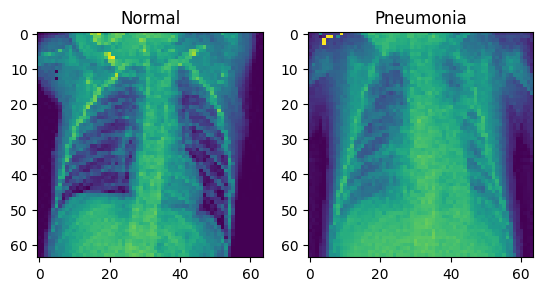



-----------------------------------PREDICTION---------------------------------


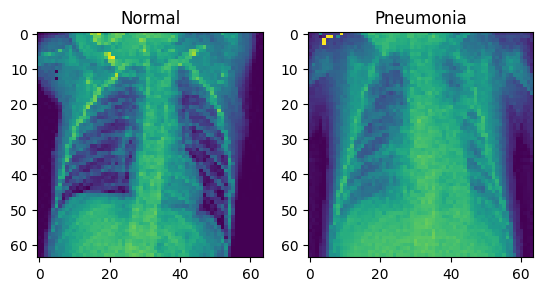

In [138]:
# predict_model

# Normal from validation
image1 = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\chest_xray_resize\\val\\NORMAL\\NORMAL2-IM-1442-0001.jpeg"
# Normal from train
# image1 = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\chest_xray_resize\\train\\NORMAL\\IM-0656-0001-0001.jpeg"
img1 = cv2.imread(image1,cv2.IMREAD_GRAYSCALE)
img1 = img1/255.0
img1 = np.array(img1)
img1 = img1.reshape(-1,img_size,img_size,1)

# Pnuemonia 
image2 = "G:\\Ajay\\dataset\\CNN\\Pneumonia Detection\\chest_xray_resize\\val\\PNEUMONIA\\person1946_bacteria_4874.jpeg"
img2 = cv2.imread(image2,cv2.IMREAD_GRAYSCALE)
img2 = img2/255.0
img2 = np.array(img2)
img2 = img2.reshape(-1,img_size,img_size,1)

prediction1 = ""
prediction2 = ""

if model.predict(img1) >0.5:
   prediction1 = "Pneumonia" 
else:
   prediction1 = "Normal"  
    
if model.predict(img2) >0.5:
   prediction2 = "Pneumonia" 
else:
   prediction2 = "Normal"  

print("\n")
print("-----------------------------------ORIGINAL---------------------------------")
plt.subplot(1, 2, 1)
plt.title(prediction1)
plt.imshow(img1.reshape(64,64,1))

plt.subplot(1, 2, 2)
plt.title(prediction2)
plt.imshow(img2.reshape(64,64,1))
plt.show()
print("\n")
print("-----------------------------------PREDICTION---------------------------------")
plt.subplot(1, 2, 1)
plt.title(prediction1)
plt.imshow(img1.reshape(64,64,1))

plt.subplot(1, 2, 2)
plt.title(prediction2)
plt.imshow(img2.reshape(64,64,1))
plt.show()
